In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 깨짐 방지
ㅜ 
# 데이터 로드
df = pd.read_csv("./combine_trend.csv", parse_dates=['BASE_YM'])
print("데이터 차원:", df.shape)


데이터 차원: (6847, 5)


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\2545142195.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("./combine_trend.csv", parse_dates=['BASE_YM'])


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BASE_YM                 6847 non-null   object 
 1   MENU_CODE               6847 non-null   object 
 2   MENU_NM                 6847 non-null   object 
 3   NTT_CNT                 6847 non-null   int64  
 4   NTT_PER_AVRG_MENTN_CNT  6847 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 267.6+ KB


In [43]:
df.head()

,BASE_YM,MENU_CODE,MENU_NM,NTT_CNT,NTT_PER_AVRG_MENTN_CNT
0,202008,CNVNC_M02001,간장·마늘치킨,636070,0.0055
1,202008,KOREA_M01001,간장·양념게장,636070,0.0308
2,202008,KOREA_M01002,갈비찜·뼈찜,636070,0.0090
3,202008,KOREA_M02001,갈비탕,636070,0.0130
4,202008,KOREA_M02002,감자탕,636070,0.0103


In [44]:
print("결측치 수:")
print(df.isnull().sum())

결측치 수:
BASE_YM                   0
MENU_CODE                 0
MENU_NM                   0
NTT_CNT                   0
NTT_PER_AVRG_MENTN_CNT    0
dtype: int64


In [45]:
print(df[['NTT_CNT', 'NTT_PER_AVRG_MENTN_CNT']].describe())

            NTT_CNT  NTT_PER_AVRG_MENTN_CNT
count  6.847000e+03             6847.000000
mean   8.414626e+05                0.022668
std    3.740650e+05                0.026155
min    4.482510e+05                0.000000
25%    5.660240e+05                0.004800
50%    6.389890e+05                0.012800
75%    1.017009e+06                0.030700
max    1.669817e+06                0.171100


In [46]:
# BASE_YM을 datetime 타입으로 변환 (YYYYMM → datetime)
df['BASE_YM'] = pd.to_datetime(df['BASE_YM'], format='%Y%m')

# 연도/월 컬럼 생성
df['YEAR'] = df['BASE_YM'].dt.year
df['MONTH'] = df['BASE_YM'].dt.month

# 결과 확인
print(df[['BASE_YM', 'YEAR', 'MONTH']].head())

     BASE_YM  YEAR  MONTH
0 2020-08-01  2020      8
1 2020-08-01  2020      8
2 2020-08-01  2020      8
3 2020-08-01  2020      8
4 2020-08-01  2020      8


In [47]:
print(df['MENU_NM'].nunique()) #메뉴 갯

167


In [48]:
# 가장 많이 등장한 메뉴 Top 10
print(df['MENU_NM'].value_counts().head(10))

MENU_NM
간장·마늘치킨         41
간장·양념게장         41
갈비찜·뼈찜          41
갈비탕             41
감자탕             41
감자튀김·사이드메뉴      41
견과류             41
계란찜·계란말이        41
고로케·소시지빵·피자빵    41
고추장찌개·돼지찌개      41
Name: count, dtype: int64


In [49]:
print(df.groupby('BASE_YM')['MENU_NM'].nunique())

BASE_YM
2020-08-01    167
2020-09-01    167
2020-10-01    167
2020-11-01    167
2020-12-01    167
2021-01-01    167
2021-02-01    167
2021-03-01    167
2021-04-01    167
2021-05-01    167
2021-06-01    167
2021-07-01    167
2021-08-01    167
2021-09-01    167
2021-10-01    167
2021-11-01    167
2021-12-01    167
2022-01-01    167
2022-02-01    167
2022-03-01    167
2022-04-01    167
2022-05-01    167
2022-06-01    167
2022-07-01    167
2022-08-01    167
2022-09-01    167
2022-10-01    167
2022-11-01    167
2022-12-01    167
2023-01-01    167
2023-02-01    167
2023-03-01    167
2023-04-01    167
2023-05-01    167
2023-06-01    167
2023-07-01    167
2023-08-01    167
2023-09-01    167
2023-10-01    167
2023-11-01    167
2023-12-01    167
Name: MENU_NM, dtype: int64


In [50]:
menu_sum = df.groupby('MENU_NM')['NTT_CNT'].sum().sort_values(ascending=False)
print(menu_sum.head(10))

MENU_NM
간장·마늘치킨         34499967
간장·양념게장         34499967
갈비찜·뼈찜          34499967
갈비탕             34499967
감자탕             34499967
감자튀김·사이드메뉴      34499967
견과류             34499967
계란찜·계란말이        34499967
고로케·소시지빵·피자빵    34499967
고추장찌개·돼지찌개      34499967
Name: NTT_CNT, dtype: int64


In [51]:
menu_per = df.groupby('MENU_NM')['NTT_PER_AVRG_MENTN_CNT'].mean().sort_values(ascending=False)
print(menu_per.head(10)) #언급량 분

MENU_NM
돼지고기 구이                  0.138478
국수·칼국수·수제비               0.114007
소보로·슈크림·브라우니·달콤한빵·과자류    0.109088
샐러드                      0.108280
튀김                       0.094012
낙지·오징어·쭈꾸미 요리            0.090732
라떼류음료                    0.084012
볶음밥                      0.082907
파스타                      0.079849
소고기구이                    0.074417
Name: NTT_PER_AVRG_MENTN_CNT, dtype: float64


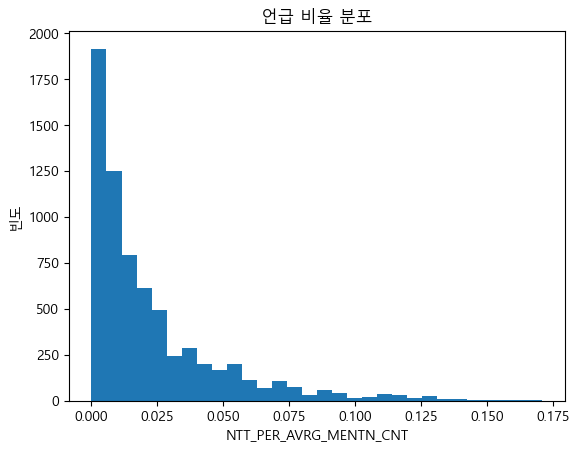

In [52]:
plt.hist(df['NTT_PER_AVRG_MENTN_CNT'], bins=30)
plt.title('언급 비율 분포')
plt.xlabel('NTT_PER_AVRG_MENTN_CNT')
plt.ylabel('빈도')
plt.show()

In [53]:
# 메뉴코드 앞 6자리(대분류)별 언급량
df['MENU_CAT'] = df['MENU_CODE'].str[:6]
cat_sum = df.groupby('MENU_CAT')['NTT_CNT'].sum().sort_values(ascending=False)
print(cat_sum)

MENU_CAT
KOREA_    2380497723
CNVNC_     931499109
FORGN_     758999274
SPECL_     724499307
DRINK_     310499703
BARFD_     275999736
ALCHL_     172499835
SNACK_     172499835
BUFFT_      34499967
Name: NTT_CNT, dtype: int64


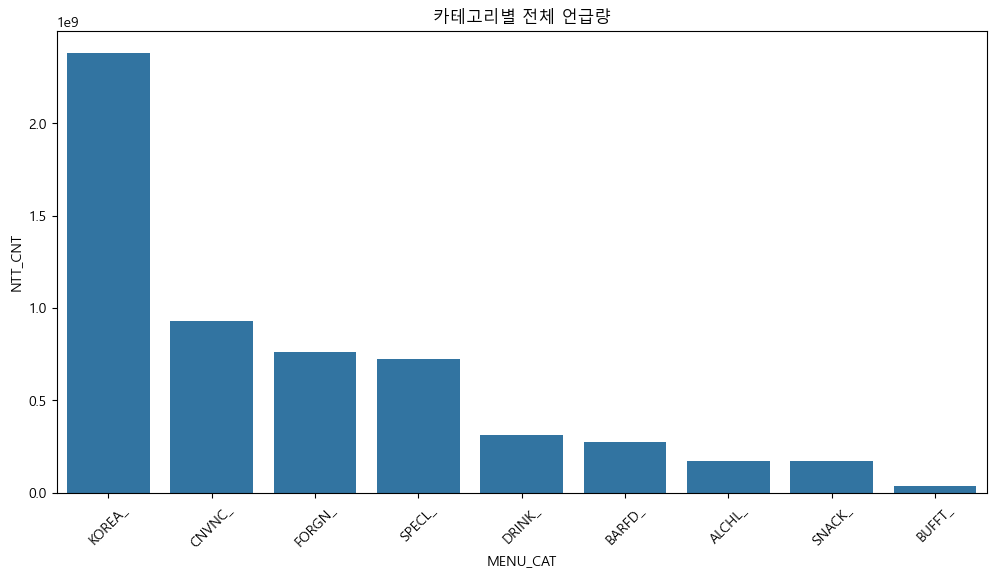

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x=cat_sum.index, y=cat_sum.values)
plt.title('카테고리별 전체 언급량')
plt.xlabel('MENU_CAT')
plt.ylabel('NTT_CNT')
plt.xticks(rotation=45)
plt.show()

In [55]:
# 월별 Top 1 메뉴
top1_per_month = df.loc[df.groupby('BASE_YM')['NTT_CNT'].idxmax()][['BASE_YM','MENU_NM','NTT_CNT']]
print(top1_per_month.head(50))

        BASE_YM  MENU_NM  NTT_CNT
0    2020-08-01  간장·마늘치킨   636070
167  2020-09-01  간장·마늘치킨   554382
334  2020-10-01  간장·마늘치킨   557590
501  2020-11-01  간장·마늘치킨   568372
668  2020-12-01  간장·마늘치킨   456619
835  2021-01-01  간장·마늘치킨   448251
1002 2021-02-01  간장·마늘치킨   463352
1169 2021-03-01  간장·마늘치킨   573269
1336 2021-04-01  간장·마늘치킨   566024
1503 2021-05-01  간장·마늘치킨   611631
1670 2021-06-01  간장·마늘치킨   575619
1837 2021-07-01  간장·마늘치킨   570270
2004 2021-08-01  간장·마늘치킨   553661
2171 2021-09-01  간장·마늘치킨   509603
2338 2021-10-01  간장·마늘치킨   561025
2505 2021-11-01  간장·마늘치킨   605620
2672 2021-12-01  간장·마늘치킨   614822
2839 2022-01-01  간장·마늘치킨   513675
3006 2022-02-01  간장·마늘치킨   476318
3173 2022-03-01  간장·마늘치킨   639368
3340 2022-04-01  간장·마늘치킨   587943
3507 2022-05-01  간장·마늘치킨   713634
3674 2022-06-01  간장·마늘치킨   785672
3841 2022-07-01  간장·마늘치킨   863273
4008 2022-08-01  간장·마늘치킨   952874
4175 2022-09-01  간장·마늘치킨   774082
4342 2022-10-01  간장·마늘치킨   886757
4509 2022-11-01  간장·마늘치킨   638989
4676 2022-12-0

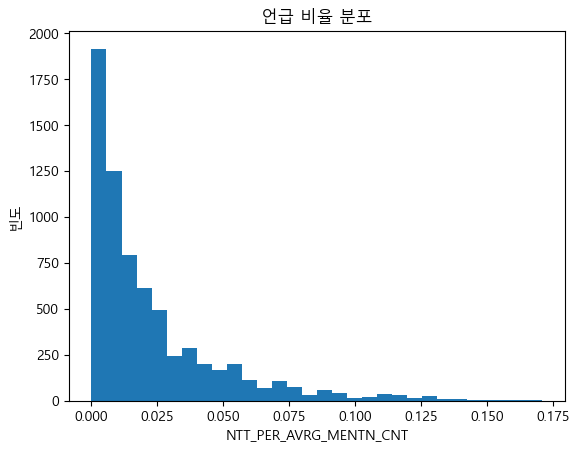

In [56]:
# 언급 비율 분포 히스토그램
plt.hist(df['NTT_PER_AVRG_MENTN_CNT'], bins=30)
plt.title('언급 비율 분포')
plt.xlabel('NTT_PER_AVRG_MENTN_CNT')
plt.ylabel('빈도')
plt.show()

In [71]:
# 월별 Top 1 메뉴
top1_per_month = df.loc[df.groupby('BASE_YM')['NTT_CNT'].idxmax()][['BASE_YM','MENU_NM','NTT_CNT']]
print(top1_per_month.head(30))

      BASE_YM  MENU_NM  NTT_CNT
0      202008  간장·마늘치킨   636070
167    202009  간장·마늘치킨   554382
334    202010  간장·마늘치킨   557590
501    202011  간장·마늘치킨   568372
668    202012  간장·마늘치킨   456619
835    202101  간장·마늘치킨   448251
1002   202102  간장·마늘치킨   463352
1169   202103  간장·마늘치킨   573269
1336   202104  간장·마늘치킨   566024
1503   202105  간장·마늘치킨   611631
1670   202106  간장·마늘치킨   575619
1837   202107  간장·마늘치킨   570270
2004   202108  간장·마늘치킨   553661
2171   202109  간장·마늘치킨   509603
2338   202110  간장·마늘치킨   561025
2505   202111  간장·마늘치킨   605620
2672   202112  간장·마늘치킨   614822
2839   202201  간장·마늘치킨   513675
3006   202202  간장·마늘치킨   476318
3173   202203  간장·마늘치킨   639368
3340   202204  간장·마늘치킨   587943
3507   202205  간장·마늘치킨   713634
3674   202206  간장·마늘치킨   785672
3841   202207  간장·마늘치킨   863273
4008   202208  간장·마늘치킨   952874
4175   202209  간장·마늘치킨   774082
4342   202210  간장·마늘치킨   886757
4509   202211  간장·마늘치킨   638989
4676   202212  간장·마늘치킨   887076
4843   202301  간장·마늘치킨  1017009


In [58]:
# 월별 Top 5 메뉴 시각화
for ym, group in df.groupby('BASE_YM'):
    print(f"{ym} Top5: {group.sort_values('NTT_CNT',ascending=False).head(5)[['MENU_NM','NTT_CNT']].values}")

2020-08-01 00:00:00 Top5: [['간장·마늘치킨' 636070]
 ['간장·양념게장' 636070]
 ['갈비찜·뼈찜' 636070]
 ['갈비탕' 636070]
 ['감자탕' 636070]]
2020-09-01 00:00:00 Top5: [['간장·마늘치킨' 554382]
 ['간장·양념게장' 554382]
 ['갈비찜·뼈찜' 554382]
 ['갈비탕' 554382]
 ['감자탕' 554382]]
2020-10-01 00:00:00 Top5: [['간장·마늘치킨' 557590]
 ['간장·양념게장' 557590]
 ['갈비찜·뼈찜' 557590]
 ['갈비탕' 557590]
 ['감자탕' 557590]]
2020-11-01 00:00:00 Top5: [['간장·마늘치킨' 568372]
 ['간장·양념게장' 568372]
 ['갈비찜·뼈찜' 568372]
 ['갈비탕' 568372]
 ['감자탕' 568372]]
2020-12-01 00:00:00 Top5: [['간장·마늘치킨' 456619]
 ['간장·양념게장' 456619]
 ['갈비찜·뼈찜' 456619]
 ['갈비탕' 456619]
 ['감자탕' 456619]]
2021-01-01 00:00:00 Top5: [['간장·마늘치킨' 448251]
 ['간장·양념게장' 448251]
 ['갈비찜·뼈찜' 448251]
 ['갈비탕' 448251]
 ['감자탕' 448251]]
2021-02-01 00:00:00 Top5: [['간장·마늘치킨' 463352]
 ['간장·양념게장' 463352]
 ['갈비찜·뼈찜' 463352]
 ['갈비탕' 463352]
 ['감자탕' 463352]]
2021-03-01 00:00:00 Top5: [['간장·마늘치킨' 573269]
 ['간장·양념게장' 573269]
 ['갈비찜·뼈찜' 573269]
 ['갈비탕' 573269]
 ['감자탕' 573269]]
2021-04-01 00:00:00 Top5: [['간장·마늘치킨' 566024]
 ['간장·양념게장

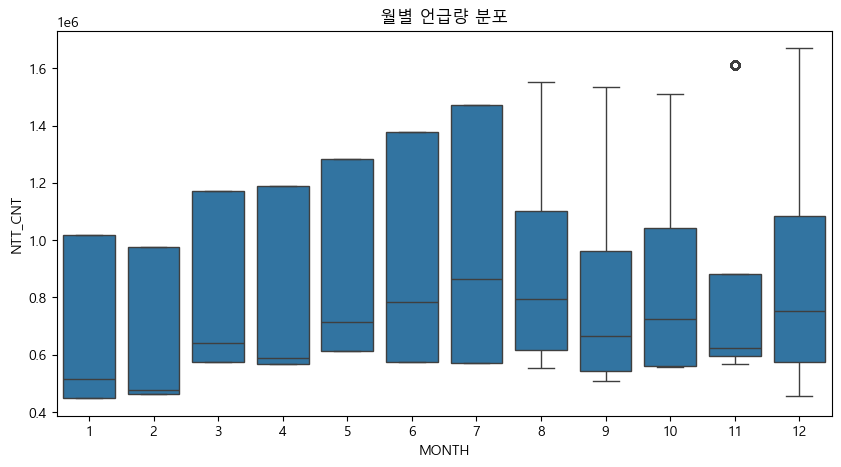

In [59]:
# 월별 전체 언급량 boxplot (계절성)
plt.figure(figsize=(10,5))
sns.boxplot(x='MONTH', y='NTT_CNT', data=df)
plt.title('월별 언급량 분포')
plt.show()

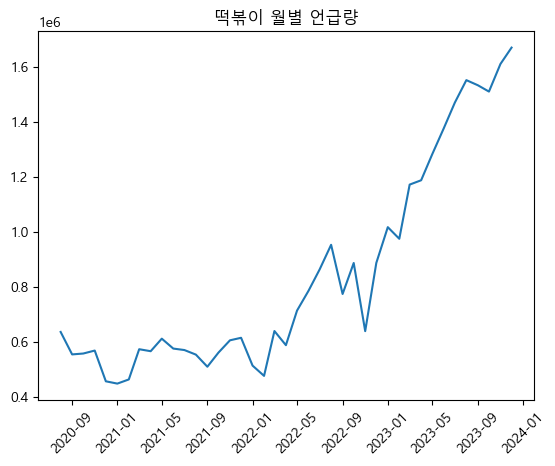

In [60]:
# 예시: '떡볶이' 월별 언급량 추이
tteok = df[df['MENU_NM'].str.contains('떡볶이')]
plt.plot(tteok['BASE_YM'], tteok['NTT_CNT'])
plt.title('떡볶이 월별 언급량')
plt.xticks(rotation=45)
plt.show()


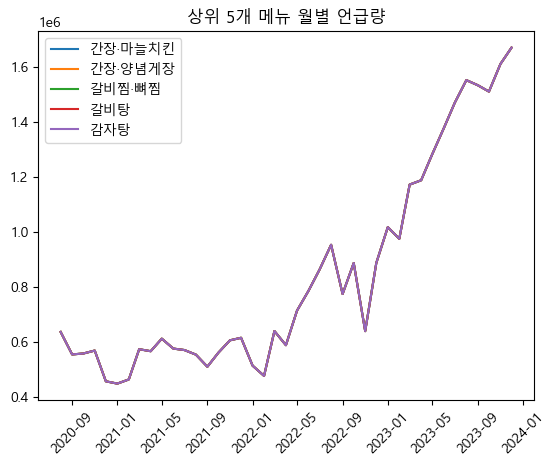

In [61]:
top5_menu = menu_sum.head(5).index.tolist()
for menu in top5_menu:
    temp = df[df['MENU_NM']==menu]
    plt.plot(temp['BASE_YM'], temp['NTT_CNT'], label=menu)
plt.legend()
plt.title('상위 5개 메뉴 월별 언급량')
plt.xticks(rotation=45)
plt.show()

In [62]:
# 메뉴별 연도별 언급량 피벗테이블
pivot = pd.pivot_table(df, index='MENU_NM', columns='YEAR', values='NTT_CNT', aggfunc='sum', fill_value=0)
print(pivot.head())

YEAR        2020     2021     2022      2023
MENU_NM                                     
간장·마늘치킨  2773033  6653147  8719661  16354126
간장·양념게장  2773033  6653147  8719661  16354126
갈비찜·뼈찜   2773033  6653147  8719661  16354126
갈비탕      2773033  6653147  8719661  16354126
감자탕      2773033  6653147  8719661  16354126


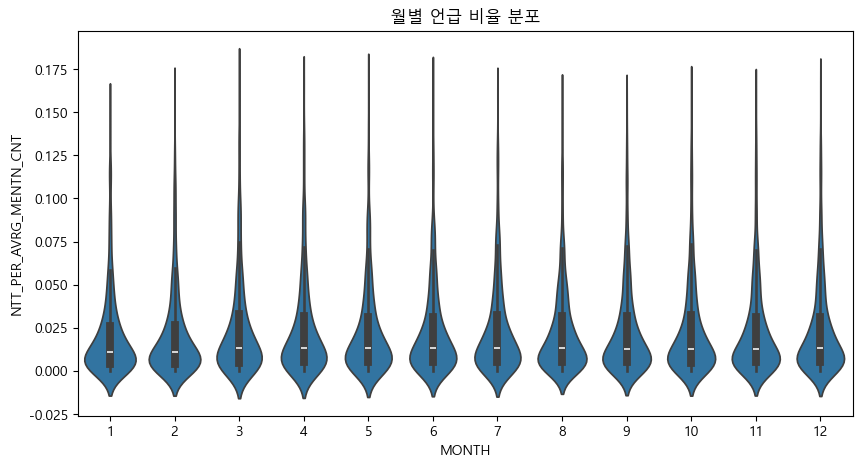

In [63]:
plt.figure(figsize=(10,5))
sns.violinplot(x='MONTH', y='NTT_PER_AVRG_MENTN_CNT', data=df)
plt.title('월별 언급 비율 분포')
plt.show()


In [64]:
menu_max = df.groupby('MENU_NM')['NTT_CNT'].max().sort_values(ascending=False)
menu_min = df.groupby('MENU_NM')['NTT_CNT'].min().sort_values()
print('최대 언급량 Top5:', menu_max.head())
print('최소 언급량 Top5:', menu_min.head())


최대 언급량 Top5: MENU_NM
간장·마늘치킨    1669817
간장·양념게장    1669817
갈비찜·뼈찜     1669817
갈비탕        1669817
감자탕        1669817
Name: NTT_CNT, dtype: int64
최소 언급량 Top5: MENU_NM
간장·마늘치킨    448251
간장·양념게장    448251
갈비찜·뼈찜     448251
갈비탕        448251
감자탕        448251
Name: NTT_CNT, dtype: int64


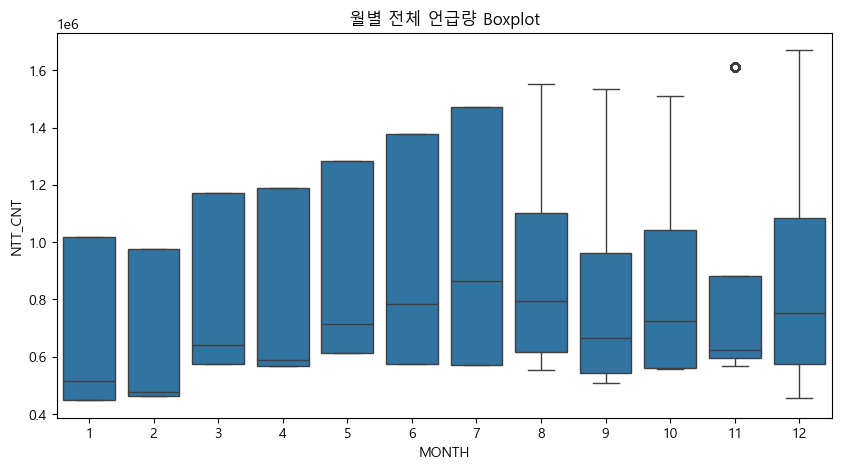

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MONTH', y='NTT_CNT', data=df)
plt.title('월별 전체 언급량 Boxplot')
plt.show()


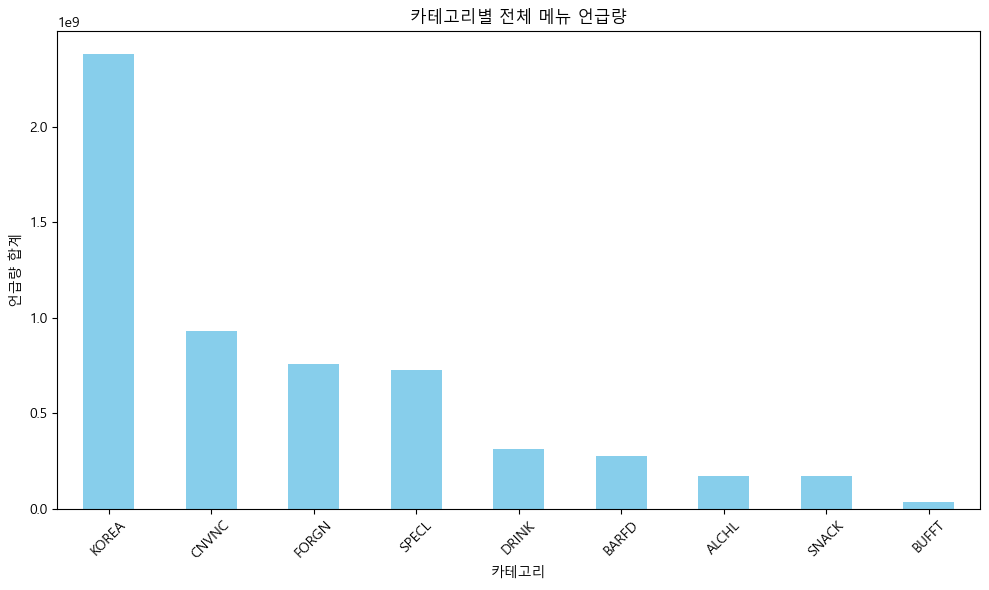

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('combine_trend.csv')

# 카테고리 추출 (MENU_CODE의 앞부분, 예: KOREA, CNVNC 등)
df['CATEGORY'] = df['MENU_CODE'].str.split('_').str[0]

# 카테고리별 전체 언급량 합계
cat_sum = df.groupby('CATEGORY')['NTT_CNT'].sum().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10,6))
cat_sum.plot(kind='bar', color='skyblue')
plt.title('카테고리별 전체 메뉴 언급량')
plt.xlabel('카테고리')
plt.ylabel('언급량 합계')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


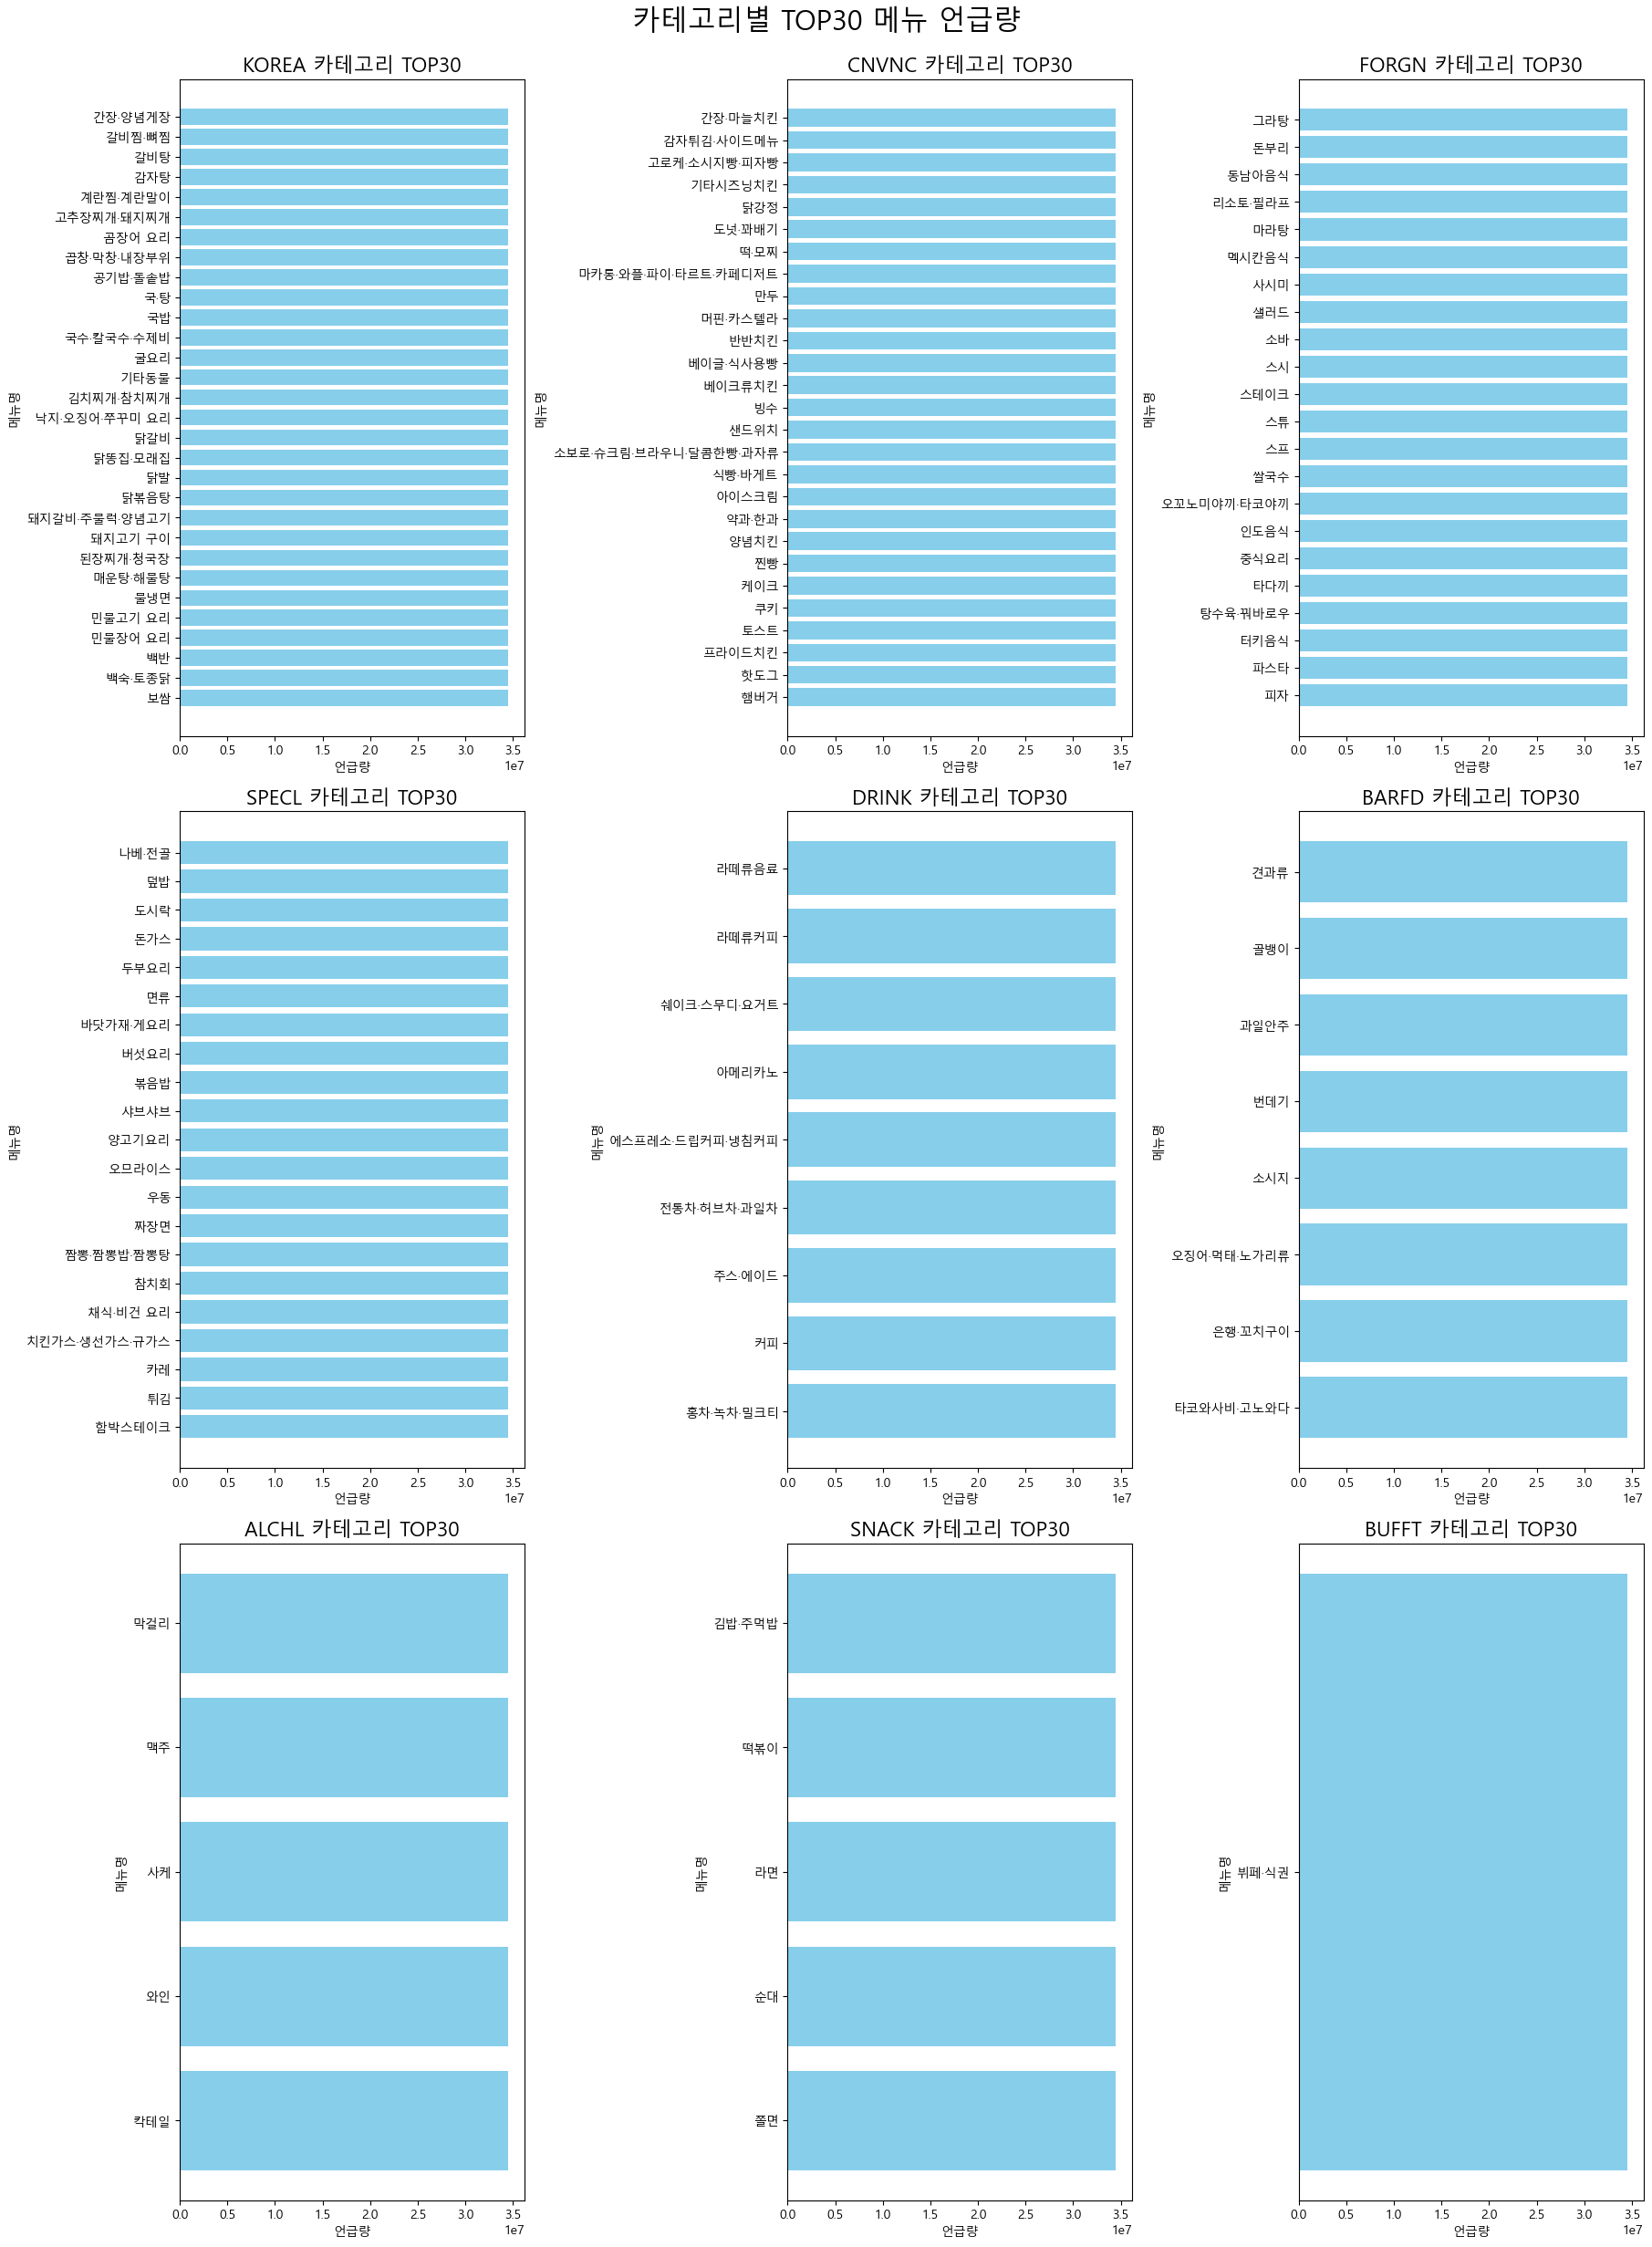

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('combine_trend.csv')

# 카테고리 추출
df['CATEGORY'] = df['MENU_CODE'].str.split('_').str[0]

# 메뉴별 전체 언급량 집계
menu_total = df.groupby(['CATEGORY', 'MENU_NM'])['NTT_CNT'].sum().reset_index()

# 카테고리별 고유값 추출 (많이 쓰이는 순서대로 정렬)
cat_order = menu_total.groupby('CATEGORY')['NTT_CNT'].sum().sort_values(ascending=False).index.tolist()

# 시각화 레이아웃 설정 (한 화면에 여러 카테고리)
n_cat = len(cat_order)
n_col = 3  # 한 줄에 3개씩
n_row = (n_cat + n_col - 1) // n_col

fig, axes = plt.subplots(n_row, n_col, figsize=(18, n_row*8), constrained_layout=True)

for idx, cat in enumerate(cat_order):
    ax = axes[idx//n_col, idx%n_col]
    top30 = menu_total[menu_total['CATEGORY'] == cat].sort_values('NTT_CNT', ascending=False).head(30)
    ax.barh(top30['MENU_NM'][::-1], top30['NTT_CNT'][::-1], color='skyblue')
    ax.set_title(f'{cat} 카테고리 TOP30', fontsize=16)
    ax.set_xlabel('언급량')
    ax.set_ylabel('메뉴명')
    ax.tick_params(axis='y', labelsize=10)

# 빈 subplot은 감추기
for idx in range(n_cat, n_row*n_col):
    fig.delaxes(axes.flatten()[idx])

plt.suptitle('카테고리별 TOP30 메뉴 언급량', fontsize=22, y=1.02)
plt.show()


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\1393050519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')


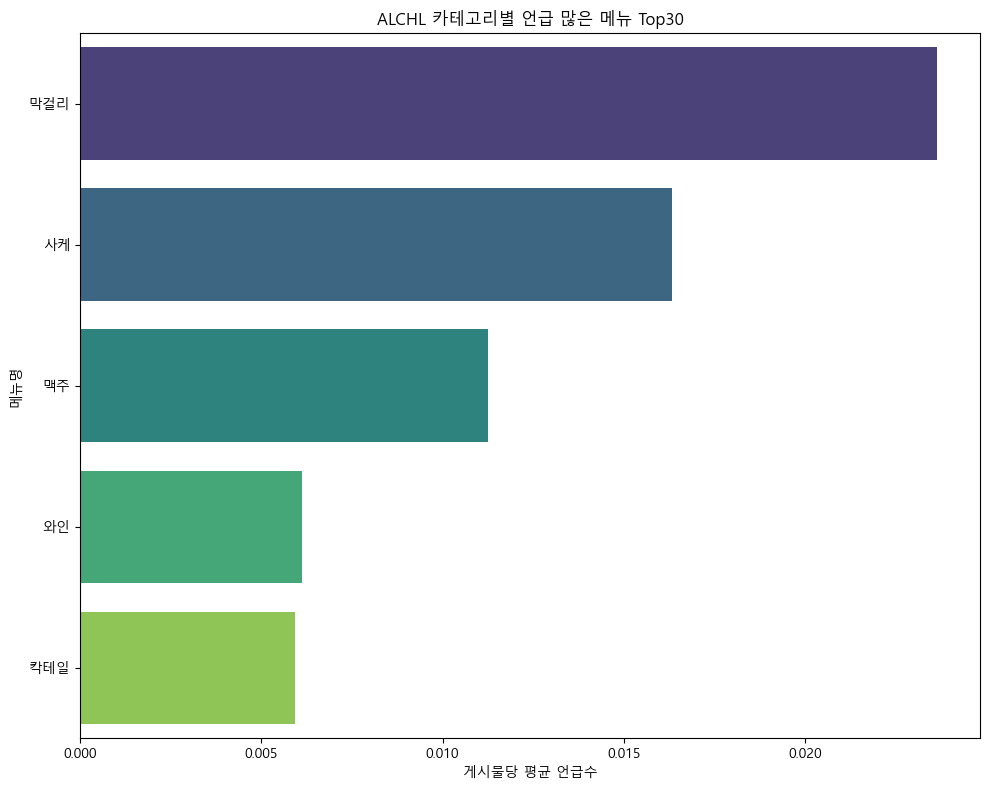

C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\1393050519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')


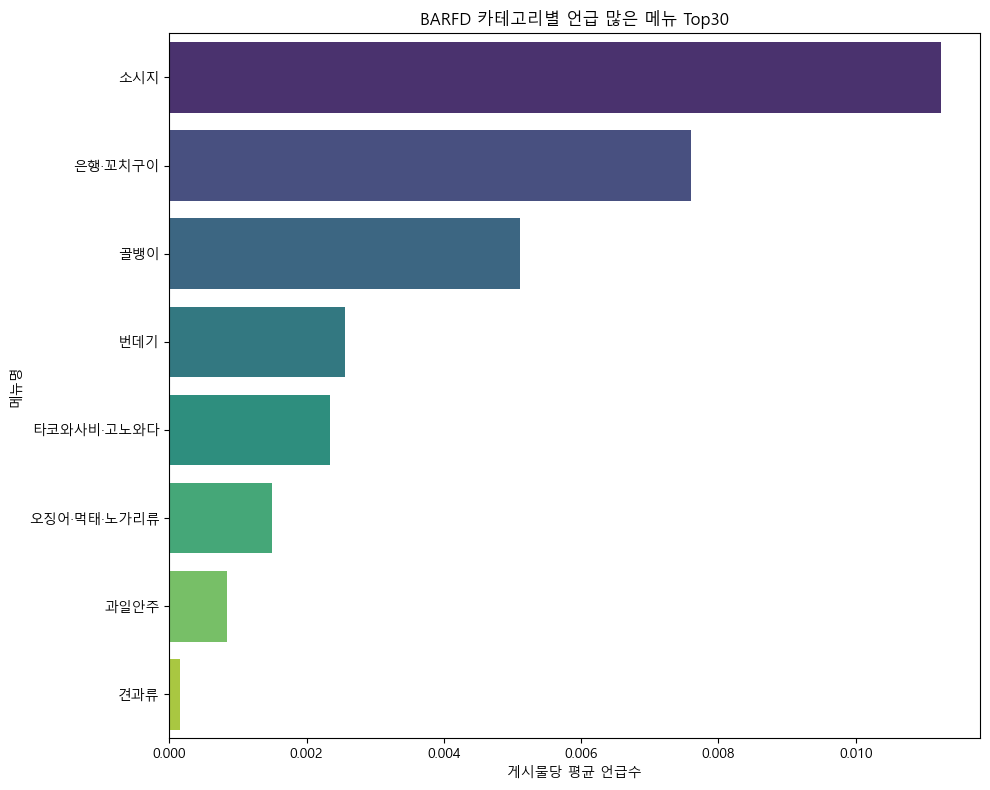

C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\1393050519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')


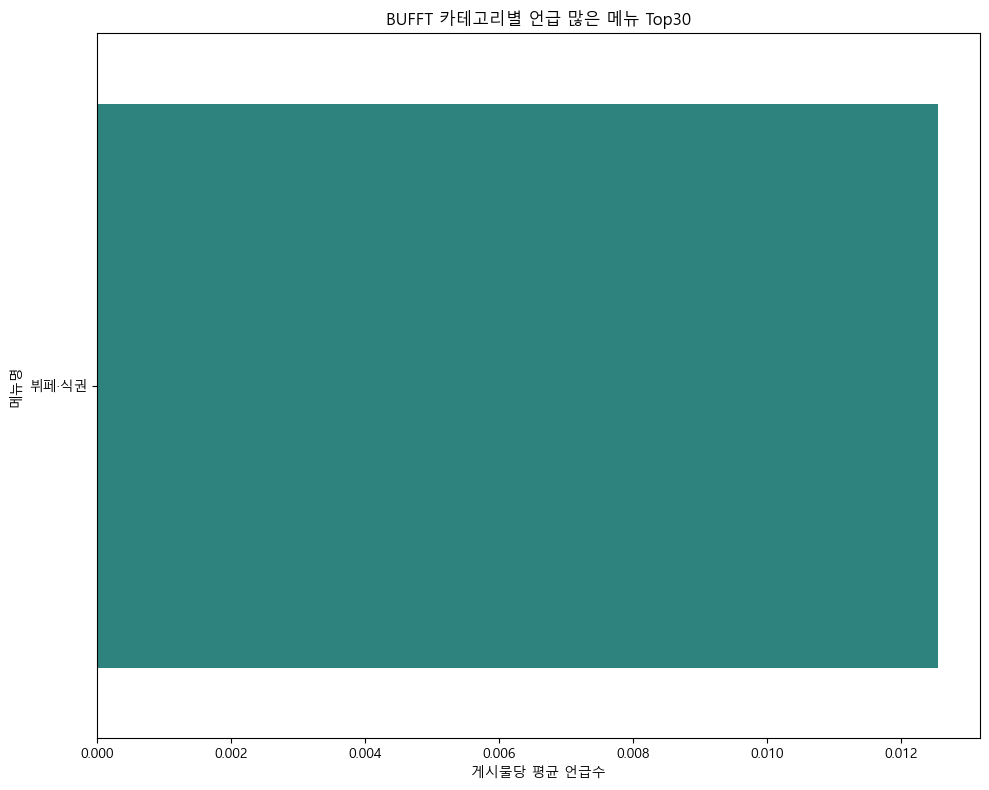

C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\1393050519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')


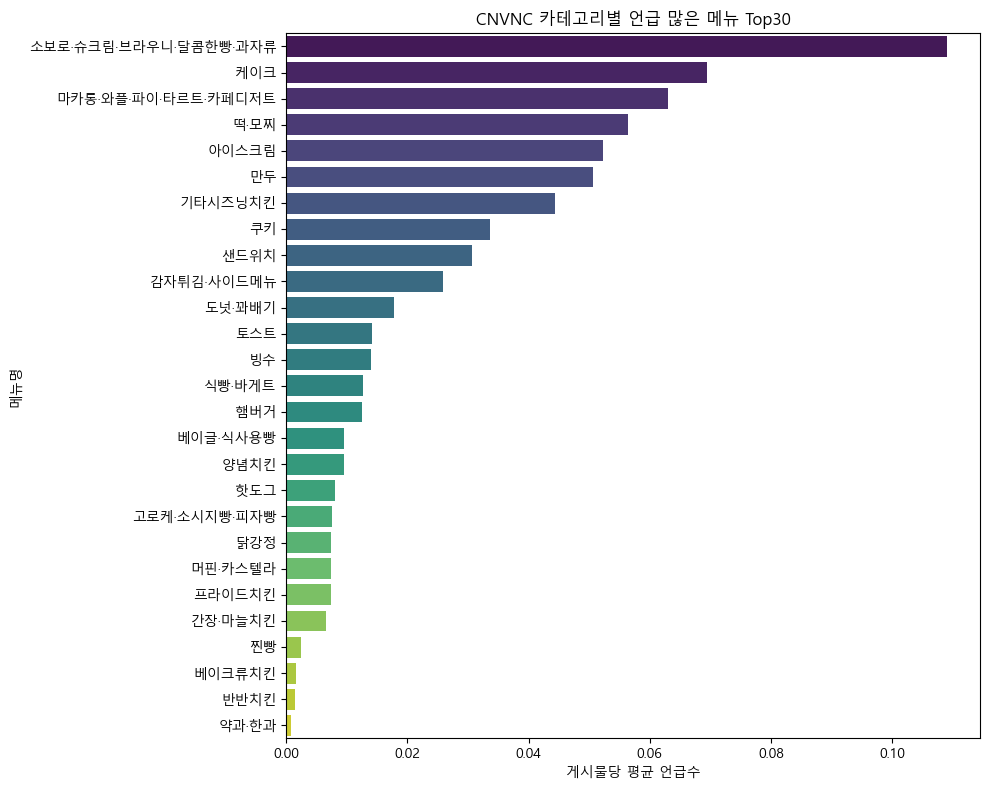

C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\1393050519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')


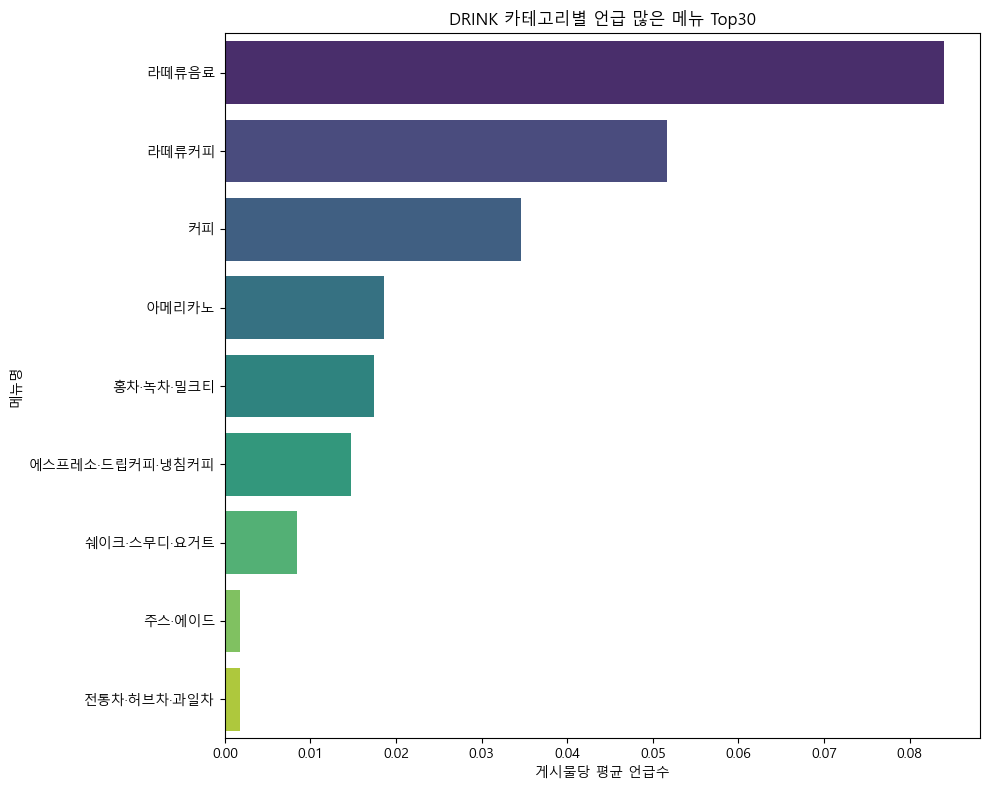

C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\1393050519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')


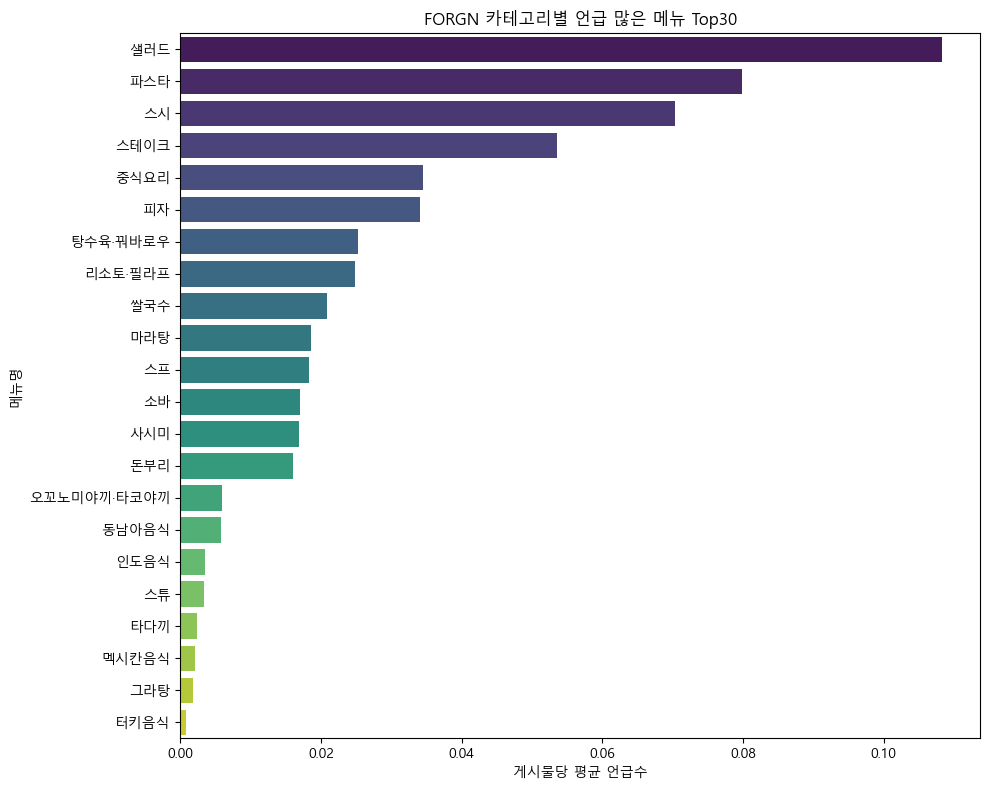

C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\1393050519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')


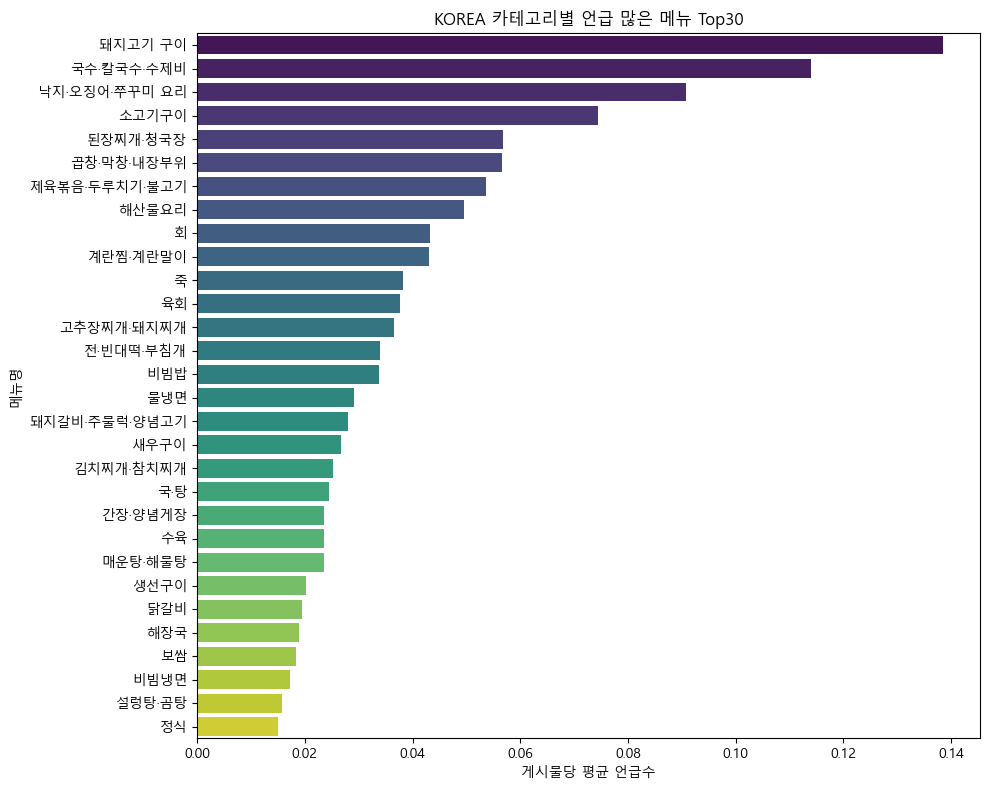

C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\1393050519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')


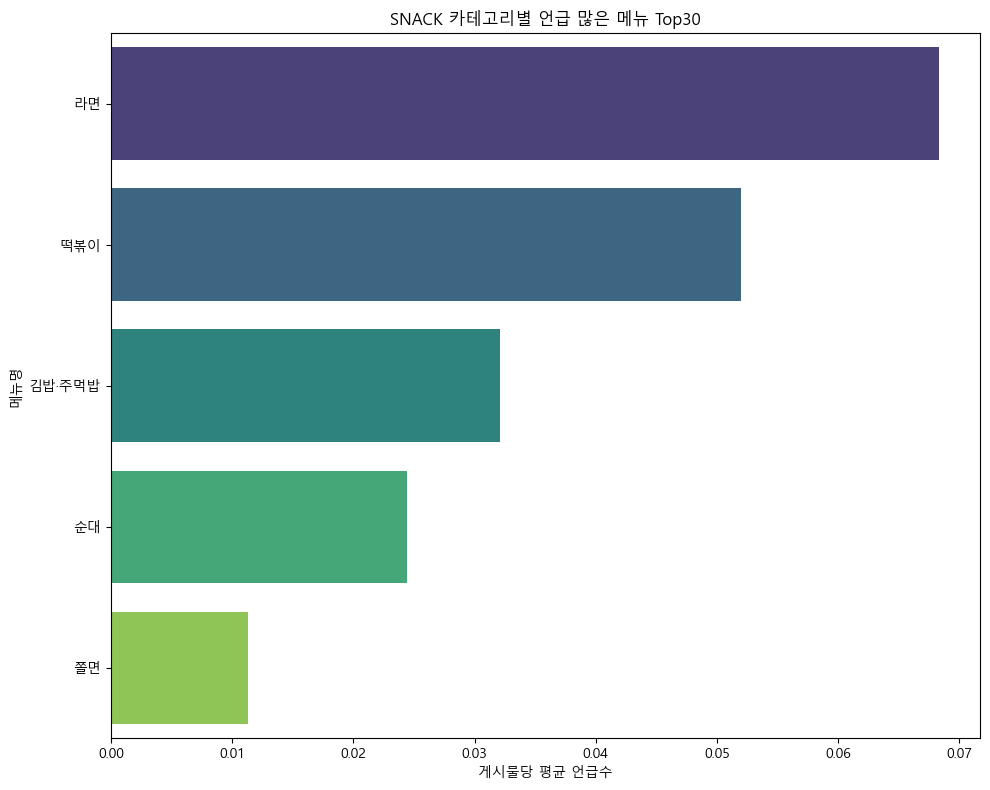

C:\Users\MINJUN\AppData\Local\Temp\ipykernel_24880\1393050519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')


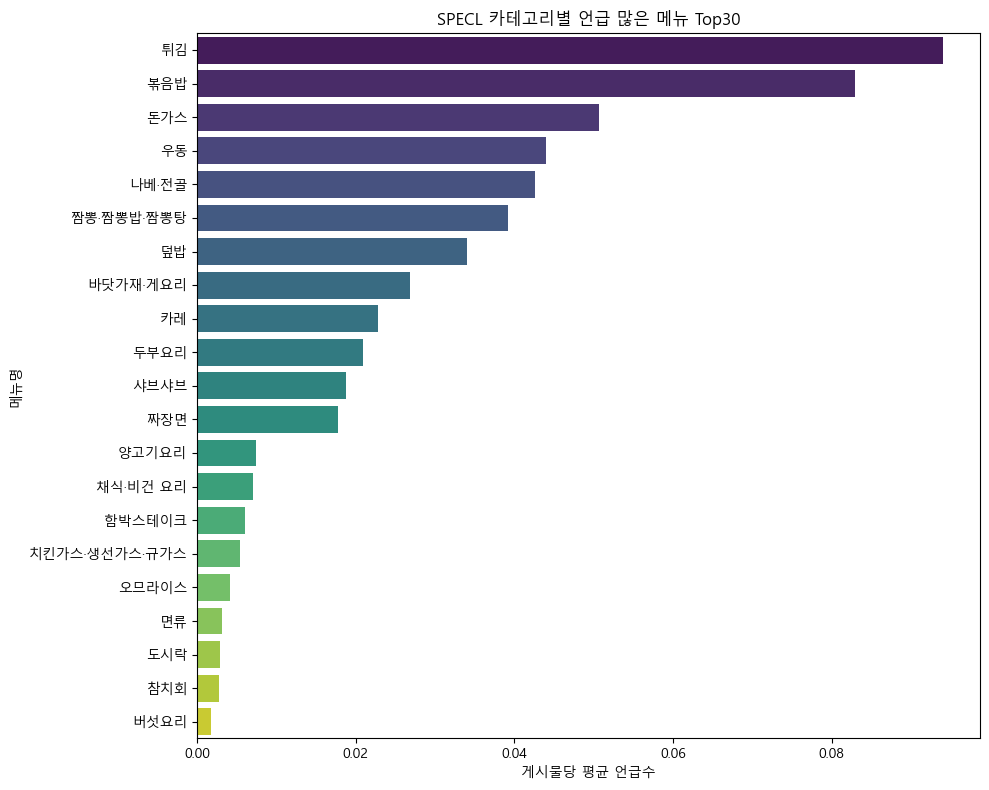

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('combine_trend.csv')

# 카테고리 추출 (MENU_CODE에서 대분류 추출)
df['CATEGORY'] = df['MENU_CODE'].apply(lambda x: x.split('_')[0])

# 메뉴별, 카테고리별 평균 언급수 계산
grouped = df.groupby(['CATEGORY', 'MENU_NM'])['NTT_PER_AVRG_MENTN_CNT'].mean().reset_index()

# 카테고리별 Top30 메뉴 추출 및 시각화
for cat in grouped['CATEGORY'].unique():
    top30 = grouped[grouped['CATEGORY'] == cat].sort_values('NTT_PER_AVRG_MENTN_CNT', ascending=False).head(30)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=top30, y='MENU_NM', x='NTT_PER_AVRG_MENTN_CNT', palette='viridis')
    plt.title(f'{cat} 카테고리별 언급 많은 메뉴 Top30')
    plt.xlabel('게시물당 평균 언급수')
    plt.ylabel('메뉴명')
    plt.tight_layout()
    plt.show()


In [87]:
#2CA3D0

In [ ]:
44,163,208